학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것  <br>
손실함수 : 신경망이 학습할 수 있도록 해주는 지표<br>
-> 손실함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표

<h3> 4.1 데이터에서 학습한다 </h3>
데이터에서 학습을 한다는 것은 가중치 매개변수의 값을 데이터를 보고 결정한다는 뜻<br>
note: 퍼셉트론도 직선으로 분리할 수 있는 선형 분리 가능 문제라면 데이터로부터 자동으로 학습이 가능 -> 퍼셉트론 수렴 정리로 증명  <br>
퍼셉트론 수렴 정리 : 미분을 활용한 학습 알고리즘을 반드시 100% 정확도로 수렴한다<br>
비선형 분리 문제는 자동으로 학습할 수 없다. <br>

4.1.1 데이터 주도 학습 <br>
- 기계학습의 중심에는 데이터가 존재하기 때문에 사람 중심 접근보다 데이터가 이끄는 접근 방식이다. <br><br>
ex_ 5라는 숫자를 인식하는 프로그램을 구현하면 <br>
1. 사람은 이미 어렷을때부터 뇌에서 프로그래밍이 되었기 이것이 5라고 금방 알지만 <br>
숨은 규칙성과 명확한 로직으로 풀기는 어렵고 오래걸릴 것이다. <br>
2. 이미지에서 특징을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법<br>
- 이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT,SURF,HOG 등의 특징을 많이 사용한다. <br>
SIFT ,SURF : 특징점 기반 인식 알고리즘 <br>
HOG : 영상의 지역적 그래디언트 방향 정보를 히스토그램으로 표현해서 영상의 형태를 표현하는 방법 <br>
이러한 방법으로 이미지의 특징을 도출하고 데이터를 벡터로 변환하고 , 변환된 벡터로 SVM,KNN 등으로 학습할 수 있다. <br>
주의할 점은 이미지를 벡터로 변환할 때 사용한 특징은 문제에 적합한 특징을 써야된다. <br>
3. 신경망은 이미지를 있는 그대로 학습한다. <br>
딥러닝을 종단간 기계학습이라고 한다. (종단간: 처음부터 끝까지)<br>
모든 문제를 같은 맥락에서 풀 수 있다는 장점이 있다. <br>
end-to-end : 중간단계없이 처음부터 끝까지 다 하는 것을 의미<br>
<br>
무조건 3번이 좋은 것은 아니다. <br>
frist .2번보다 많은 양의 데이터가 필요하다.<br>
second . <br>
ex_ 개찰구에서 얼굴인식하여 신분을 파악하는 장치가 있다고 치고 카메라가 사람을 찍고 이 이미지로 신경망이 바로 결과를 도출하는 것보다<br>
단계를 두어 소프트웨어가 얼굴을 인식하여 확대한 이미지로 신경망이 결과를 도출하는 것이 더 효율적이다. <br>
1) 복잡한 문제를 분리하여 각각 간단한 문제로 구현을 할 수 있다는 점<br>
2) 데이터의 정보가 각각의 작업에 더 적합되게 사용된다. <br>

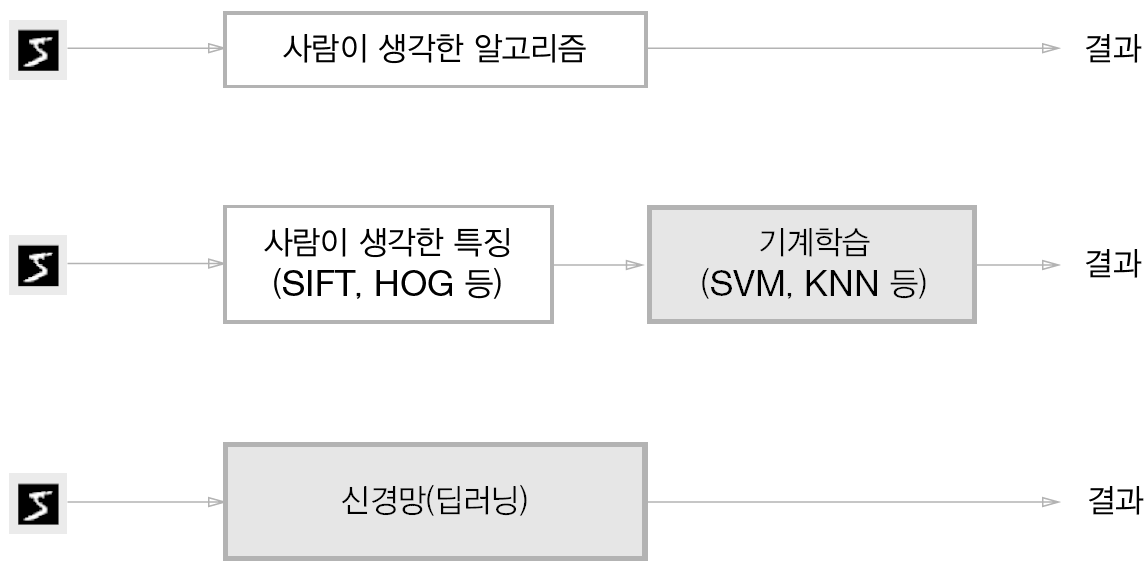

4.1.2 훈련 데이터와 시험 데이터 <br>
기계학습의 최종 목표인 범용능력을 획득하기 위해 데이터를 나눈다<br>
(범용능력: 처음본 데이터로도 문제를 푸는 능력)<br>
훈련데이터(train data)로 최적의 매개변수를 찾고, 시험데이터(test data)로 범용 능력을 평가 <br>
오버피팅(과적합): train data를 과하게 학습하여 train data에서는 loss가 작지만 test data 에는 loss가 증가한 것 <br>




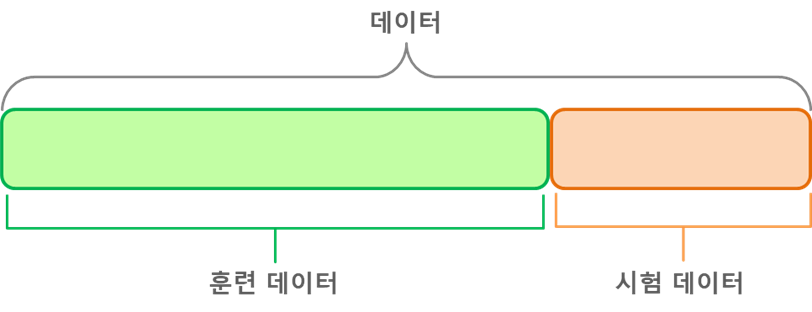

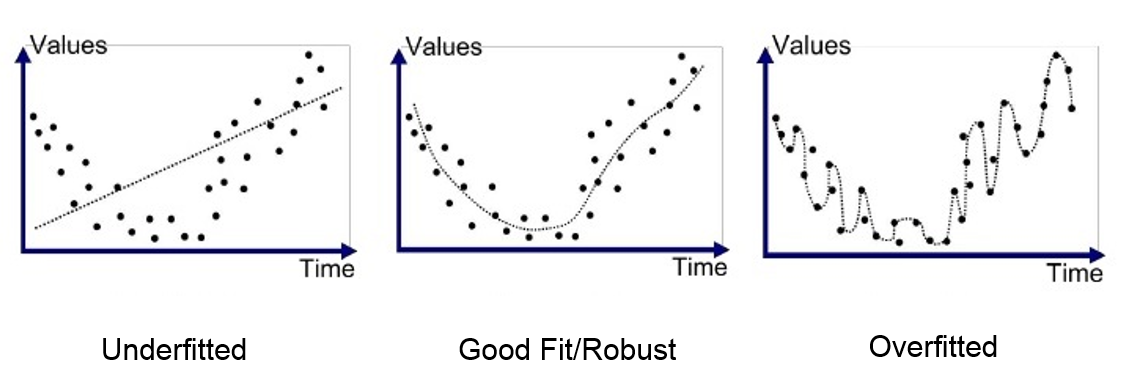

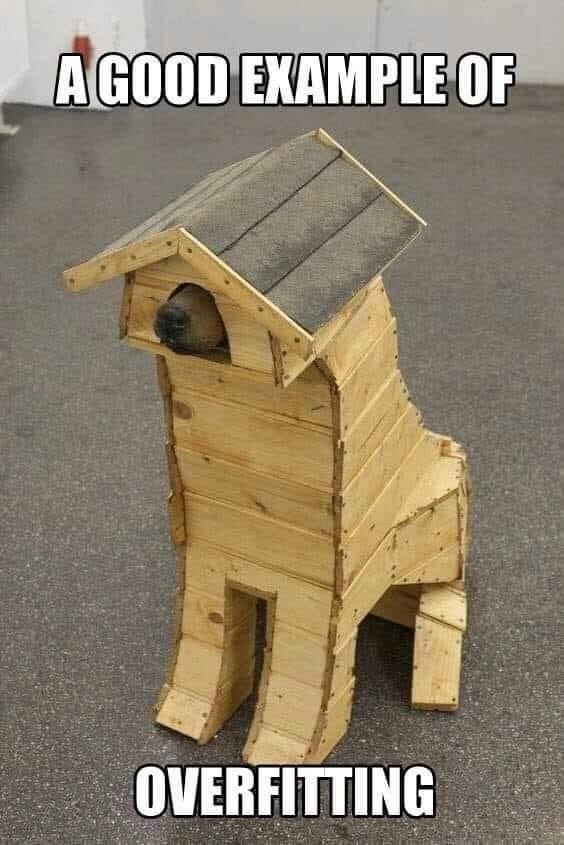

<h3>4.2 손실 함수 </h3>
loss function (=cost function 비용함수) : 신경망은 손실함수를 최대한 줄이는 방향으로 최적의 매개변수 값을 탐색한다.  <br>
즉 손실함수라는 지표를 기준으로 최적의 매개변수 값을 탐색 <br>
note . 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하느냐를 나타냄 <br>
(훈련과정을 통해 나온 답이랑 훈련데이터의 답을 비교)



4.2.1 오차제곱합 <br>
- 가장 많이 사용하는 손실함수 <br>
image.png

y = 신경망 모델이 추정한 값 / t = 정답 레이블 및 데이터 <br>

In [42]:
def sse(y,t):
  return 0.5 * np.sum((y-t)**2)

In [43]:
import numpy as np 
# 실제 정답 :2 
t = [0,0,1,0,0,0,0,0,0,0] # 원-핫-인코딩

# ex1 : '2'일 확률이 가장 높다고 추정 (소프트맥스 함수)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
sse(np.array(y), np.array(t))

0.09750000000000003

In [44]:
# ex2 : '7'일 확률이 가장 높다고 추정 (소프트맥스 함수)
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
sse(np.array(y), np.array(t))

0.5975

작을 수록 오차가 더 작으므로 첫번째는 정답에 더 가까울 것이라고 판단 <br>
<br>
참고로 mse(평균제곱오차) 와 sse는 같은 것이 아니다.<br>
오차제곱합을 보정하기 위해서 오차의 자유도로 나누게 되는데 이를 
평균제곱오차라고 함 <br>

4.2.2 교차 엔트로피 오차 <br>
image.png

log = 밑이 e인 자연로그 <br>
y = 신경망 출력값  /  t= 정답 값 <br>
t는 원-핫인코딩으로 정답값만 1이므로 정답레이블만 계산된다. <br>
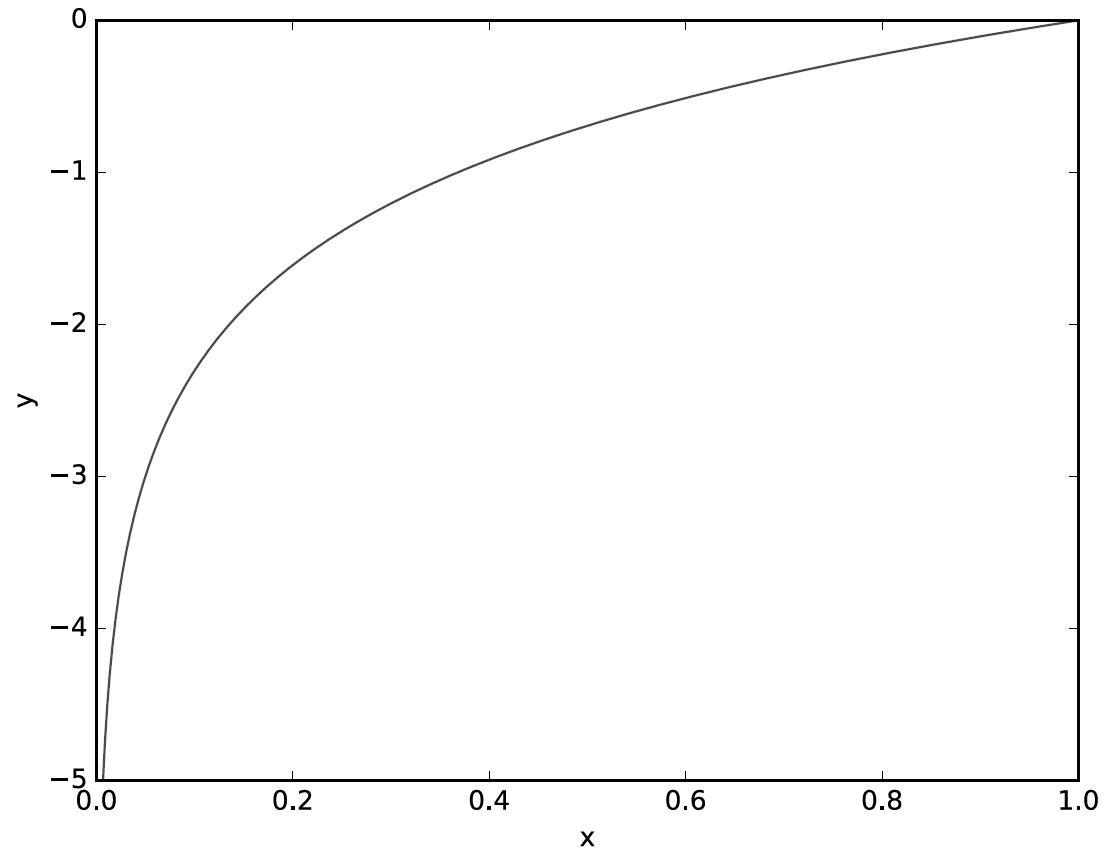

정답에 해당하는 출력(확률)이 커질수록 0에 가까워지고, 반대로 오답에 해당하는 출력(확률)일 수록 값은 커진다.  <br>
시그마 앞이 - 이기 때문에 이런 식으로 나옴

In [ ]:
# 구현 
def cross(y,t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))
  # delta라는 아주 작은 값을 넣어 np.log(0)이면 마이너스 무한대가 생기는 불상사를 방지 

In [ ]:
# 실제 정답 :2 
t = [0,0,1,0,0,0,0,0,0,0] # 원-핫-인코딩

# ex1 : '2'일 확률이 가장 높다고 추정 (소프트맥스 함수)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print('ex:1 ' ,cross(np.array(y), np.array(t)))

# ex2 : '7'일 확률이 가장 높다고 추정 (소프트맥스 함수)
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print('ex:2 ' ,cross(np.array(y), np.array(t)))

# 여기서도 ex.1 이 더 작은 값이 나온 것을 보아 2가 정답이라고 판단

ex:1  0.510825457099338
ex:2  2.302584092994546


4.2.3 미니배치 학습 <br>
모든 훈련 데이터를 대상으로 각자의 손실 함수 값을 구하는 것은 시간이 너무 오래걸린다. <br>
그래서 데이터 일부를 추려 전체의 '근사치'로 이용한다.<br>
미니배치 학습 : 훈련데이터로부터 일부만 골라 학습을 수행 <br>
np.random.choice() 함수를 사용하면 무작위로 원하는 개수만 꺼낼 수 있다. <br>

image.png <br>
교차엔트로피오차에서 n으로 정규화해서 평균 손실 함수를 구함  

note : 미니배치의 손실 함수로 데이터 전체를 비슷하게 계측한다. <br>

In [ ]:
# 0이상 60000미만에서 10개의 랜덤 수 출력 
np.random.choice(60000,10) 

array([53042, 14949, 11116, 26376, 57106, 42518, 39912,  1125,   107,
       29068])

4.2.4 (배치용)교차 엔트로피 오차 구현 <br>

In [ ]:
# one-hot encoding 구현
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)

  batch_size = y.shape[0]
  print(batch_size)
  return -np.sum(t * np.log(y+1e-7)) / batch_size 

In [ ]:
# 숫자 레이블일시
def cross_entropy_error_2(y,t):
  if y.ndim ==1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)

  batch_size = y.shape[0]
  print(batch_size)
  print(y[np.arange(batch_size), t])
  return -np.sum(np.log(y[np.arange(batch_size), t]+ 1e-7)) / batch_size

4.2.5 왜 손실 함수를 설정하는가? <br>
매개변수의 미분을 계산하고, 그 미분 값을 단서로 매개변수의 값을 갱신함<br>
미분 값이 음수면 가중치 매개변수를 양의 방향으로 변화 <br>
미분 값이 양수면 가중치 매개변수를 음의 방향으로 변화하여 손실 함수의 값을 줄임 
<br>
0이면 갱신을 멈춤 
<br>
정확도라는 지표를 놔두고 손실함수의 값으로 우회적인 방법을 하는 이유는 무엇인가?<br>
정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다. <br>
정확도는 불연속적인 띄엄띄엄한 값이기 때문에(34%,35%) 큰 변화가 아닌이상 약간만 조정해서는 정확도가 개선이 안되어 0값이 나옴 <br>
하지만 손실함수의 값은 연속적이라서 변화 <br>
이는 계단함수를 활성화함수로 사용하지 않는 이유랑 같다. 

<h3> 4.3 수치 미분 </h3>
4.3.1 미분 <br>
= 특정 순간의 변화량 <br>

image.png

In [1]:
# 나쁜 구현 예
def numerical_diff(f,x):
  h = 10e-50
  return (f(x+h)-f(x))/h

In [6]:
# 반올림 오차
import numpy as np
np.float32(1e-50)

0.0

1. h의 값이 너무 작아서 반올림 오차 문제를 일으킨다. <br>
너무 작은 값을 이용하면 컴퓨터로 계산하는데 문제가 생긴다.(파이썬은 0으로 인식)<br>
2. 함수 f의 차분과 관련된 것<br>
- 진정한 미분은 x위치의 함수의 기울기를 해당하지만 <br>
- 이번 구현의 미분은 (x+h) 와 x사이의 기울기에 해당한다. <br>


f(x+h)-f(x-h) : x를 중심으로 그 전후의 차분을 계산한다. = 중심차분, 중앙차분 <br>
f(x+h)-f(x) = 전방차분 

In [7]:
def numerical_diff(f,x):
  h = 1e-4 # 0.0001
  return (f(x+h)-f(x-h))/ (2*h)

note : 아주 작은 차분으로 미분하는 것 = 수치 미분 <br>

4.3.2 수치 미분의 예 <br>
image.png

In [8]:
# 구현
def function_1(x):
  return 0.01*x**2 + 0.1*x

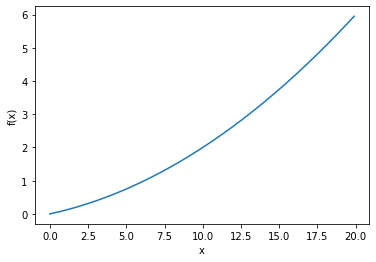

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0,20.0,0.1) # 0에서 20까지 0.1 간격의 배열 x를 만듬
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

0.1999999999990898
0.2999999999986347
0.2999999999986347


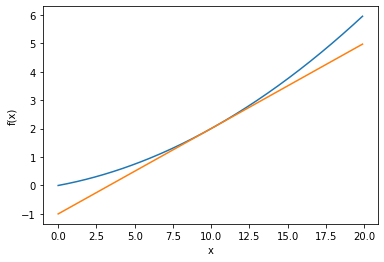

In [12]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))
# 미분 값이 x에 대한 f(x)의 변화량 = 함수의 기울기

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.xlabel('x'); plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

4.3.3 편미분 <br>
= 변수가 여럿인 함수에 대한 미분 <br>
- 인수들의 제곱 합을 계산하는 식 <br>

In [13]:
def function_2(x):
  return x[0] **2 + x[1]**2  

In [14]:
# x0 = 3 , x1=4 일때 x0에 대한 편미분
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0 # x1은 4라는 것을 고정

numerical_diff(function_tmp1,3.0)


6.00000000000378

In [15]:
# x0=3, x1 = 4 일 때 x1에 대한 편미분
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1 # x0은 3이라는 것을 고정 

numerical_diff(function_tmp2, 4.0)

7.999999999999119

<h3> 4.4 기울기 </h3>
x0 과 x1의 편미분을 동시에 계산 <br>
기울기 : 모든 변수의 편미분을 벡터로 정리한 것

In [20]:
# 기울기 구현
def numerical_gradient(f,x):
  h = 1e-4 # 0.0001
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h) 계산
    x[idx] = tmp_val +h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1-fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad 

In [17]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


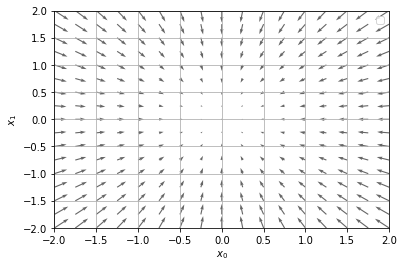

가장 낮은 장소 (최솟값)을 가리키고 있다. <br>
또한 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐을 알 수 있음 <br>
<b> 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

4.4.1 경사법(경사 하강법)<br>
손실 함수가 최솟값이 될 때의 매개변수 값을 찾아야 한다. <br>
기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법 <br>
기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나 , 그 방향으로 가야 함수의 값을 줄일 수 있다 <br>
<br>
[경사법] <br>
- 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하는 것을 반복한다. <br>
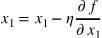

n기호는 갱신하는 양 = learning rate (학습률) <br>
매개변수 값을 얼마나 갱신하느냐 정하는 것 

In [23]:
# f = 최적화하려는 함수 / init_x = 초깃값 / lr = 학습률 / step_num = 반복횟수 
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

In [24]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x = init_x, lr=0.1, step_num=100)

(array([-6.11110793e-10,  8.14814391e-10]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [-2.40000000e+00,  3.20000000e+00],
        [-1.92000000e+00,  2.56000000e+00],
        [-1.53600000e+00,  2.04800000e+00],
        [-1.22880000e+00,  1.63840000e+00],
        [-9.83040000e-01,  1.31072000e+00],
        [-7.86432000e-01,  1.04857600e+00],
        [-6.29145600e-01,  8.38860800e-01],
        [-5.03316480e-01,  6.71088640e-01],
        [-4.02653184e-01,  5.36870912e-01],
        [-3.22122547e-01,  4.29496730e-01],
        [-2.57698038e-01,  3.43597384e-01],
        [-2.06158430e-01,  2.74877907e-01],
        [-1.64926744e-01,  2.19902326e-01],
        [-1.31941395e-01,  1.75921860e-01],
        [-1.05553116e-01,  1.40737488e-01],
        [-8.44424930e-02,  1.12589991e-01],
        [-6.75539944e-02,  9.00719925e-02],
        [-5.40431955e-02,  7.20575940e-02],
        [-4.32345564e-02,  5.76460752e-02],
        [-3.45876451e-02,  4.61168602e-02],
        [-2.76701161e-02,  3.689

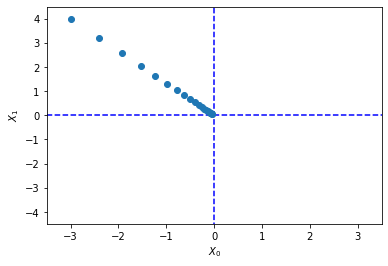

In [25]:

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.show()


In [ ]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x = init_x, lr=10.0, step_num=100)
# 너무 큰 값이 나옴 

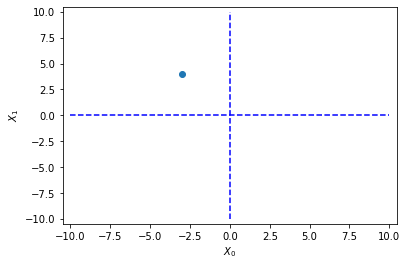

In [34]:
init_x = np.array([-3.0, 4.0])    

lr = 10
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-10, 10], [0,0], '--b')
plt.plot( [0,0], [-10, 10], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-10.5, 10.5)
plt.ylim(-10.5, 10.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.show()

In [ ]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x = init_x, lr=1e-10, step_num=100)
# 갱신이 안되고 끝남

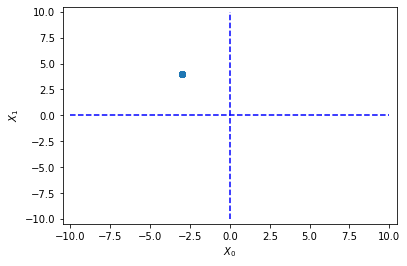

In [33]:
init_x = np.array([-3.0, 4.0])    

lr = 1e-10
step_num = 100
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-10, 10], [0,0], '--b')
plt.plot( [0,0], [-10, 10], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-10.5, 10.5)
plt.ylim(-10.5, 10.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.show()

note : 학습률 같은 매개변수를 하이퍼파라미터라고 한다. <br>
이건 신경망에 의해서 자동으로 획득되는 매개변수가 아니라. 사람이 직접 설정해야하는 매개변수 <br>
여러 후보 값 중에서 시험을 통해 가장 잘 학습되는 값을 찾아야된다 .<br>


4.4.2 신경망에서의 기울기 <br>
가중치 매개변수에 대한 손실 함수의 기울기를 구해야 된다. <br>
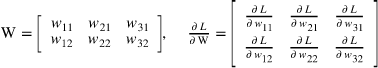

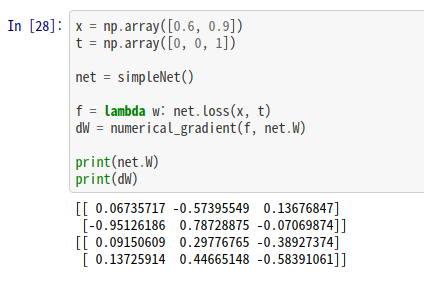


손실 함수를 줄인다는 관점에서 (0으로 향하기 위해) <br>
w11은 음의 방향으로 갱신해야되고 w23은 양의 방향으로 갱신해야된다. <br>
또한 w23이 w11보다 갱신되는 양에 크게 기여한다.  <br>
<br>
이렇게 신경망의 기울기를 구한 다음 경사법에 따라 가중치 매개변수를 갱신하면된다.<br>

<h3> 4.5 학습 알고리즘 구현하기 </h3>
1. 미니배치 : 훈련 데이터 중 일부를 무작위로 가져옴 / 미니배치의 손실 함수 값을 줄이는 것이 목표<br>
2. 기울기 산출 :  손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함<br>
기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시 <br>
3. 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신 <br>
4. 1~3단계 반복 <br>
<br>
데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법(SGD)라고 부른다.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4.5.1 2층 신경망 클래스 구현하기 <br>

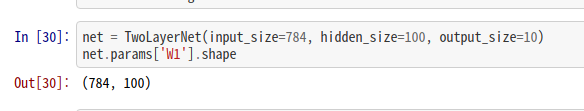

은닉층이 100개 라서 100 <br>

__init__ (self,input_size,hidden_size, output_size)<br>
mnist 에서 입력이미지는 28*28 = 784 이므로 input_size = 784<br>
출력은 0~9까지의 숫자레이블이니까 10개해서 output_size =10 <br>
hidden_size는 적당한 값으로 설정 hidden_size = 100 <br>
<br>
__init__ 메서드 : 클래스를 초기화함 , 가중치 매개변수도 초기화 <- 정규분포를 따르는 난수, 편향은 0으로 초기화<br>
predict, accuracy 메서드 : 예측값과 정확도를 구함 <br>
loss 메서드 : 손실 함수의 값을 계산하는 메서드 - 교차 엔트로피 오차 <br>
numerical_gradient 메서드 : 각 매개변수의 기울기를 계산 <br>
- 수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기를 계산 <br>
<br>
gradient는 오차역전파법을 사용해 기울기를 효율적이고 빠르게 계산 <br>
- 수치 미분을 사용할 때와 거의 같은 결과로 훨씬 빠르게 구할 수 있다. 

4.5.2 미니배치 학습 구현하기 <br>
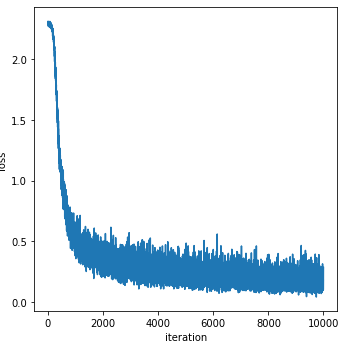

학습 횟수가 늘어나면서 손실 함수의 값이 줄어든다. <br>
데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가서고 있다. <br>


4.5.3 시험 데이터로 평가하기 <br>
윗 그림에서 볼 수 있듯이 훈련 데이터의 미니배치에 대한 손실 함수의 값이 서서히 내려가는 것을 확인 <br>
하지만 이 결과만으로도 다른 데이터셋에도 비슷한 성과가 나올지는 확실치 않다.<br>
오버피팅이 일으키지 않았는지 확인하기 위해 정기적으로 훈련데이터와 시험데이터를 대상으로 정확도를 기록 <br>
<br>
note : 에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당<br>
훈련데이터 10000개를 100개의 미니배치로 학습한 경우 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진하게 됨<br>
이 경우 100회가 1에폭이 됨


여기서는 1에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고 결과 기록<br> 
1에폭마다 계산하는 이유는 for문 으로 매번계산하기에는 시간이 오래 걸리고 자주 기록할 필요가 없기 때문 <br>

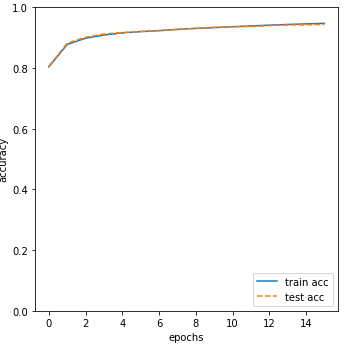

에폭이 진행될수록 train 과 test data의 정확도가 모두 좋아지고 있다. <br>
두 정확도에는 차이가 없는 것을 보아 오버피팅이 일어나지 않았다.<br>
<br>
만약 오버피팅이 일어난다면 train 정확도는 에폭을 반복할수록 높아진다.<br>
하지만 어느순간부터 test 정확도는 점차 떨어지기 시작한다. <br>
이 떨어지는 순간을 포착해 학습을 중단하는 것은 조기 종료라고 하며 6.4에서 배울 예정<br>

<h3> 4.6 정리 </h3>

- 기계학습에서 사용하는 데이터셋은 훈련데이터와 시험데이터로 나눠 사용<br>
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가 <br>
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신 <br>
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복 <br>
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분<br>
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.<br>
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 오차역전파법은 기울기를 고속으로 구할 수 있다.<br>